In [258]:
import risk
reload(risk)

<module 'risk' from 'risk.py'>

In [254]:
import random, numpy, math, os
import matplotlib.pyplot as plt
%matplotlib inline

In [255]:
def select(sample, fct='safe_nodes', n=2):
    sorted_sample = sorted(sample, key=lambda x: getattr(x, fct)(), reverse=True)
    return sorted_sample[:len(sample)/n]
def expand(sample, n=2):
    retval = [ ]
    for a in sample:
        for i in range(n):
            x = risk.Allocation(a)
            if i > 0:
                x.swap()
            retval.append(x)
    return retval
def best(sample, fct='safe_nodes'):
    return max([getattr(x, fct)() for x in sample])
def iterate(sample, fct='safe_nodes', n=2):
    return select(expand(sample, n), fct=fct, n=n)

In [256]:
def optimise(n_regions=21, n_allocations=100, n_iterations=1000, fct='safe_nodes', divide=3, verbose=False):
    sample = [risk.Allocation(n_regions) for i in range(n_allocations)]
    for i in range(n_iterations):
        sample = iterate(sample, n=divide, fct=fct)
        if verbose and i%100 == 0:
            print i, best(sample)
    return sample

In [266]:
def optimise_double(n_regions=21, n_allocations=100, n_iterations=1000, fct1='safe_nodes', fct2='new_armies', divide=3, verbose=False):
    sample = [risk.Allocation(n_regions) for i in range(n_allocations)]
    for i in range(n_iterations):
        sample = iterate(sample, n=divide, fct=fct1)
        sample = iterate(sample, n=divide, fct=fct2)
        if verbose and i%100 == 0:
            print i, best(sample, fct1), best(sample, fct2)
    return sample

In [ ]:
nodes = optimise(n_regions=10,fct='safe_nodes')

In [272]:
ratio = optimise(n_regions=10,fct='safe_ratio')

In [ ]:
difference = optimise(n_regions=10, fct='safe_difference')

In [269]:
army_difference = optimise(n_regions=10,fct='new_difference')

In [270]:
double = optimise_double(n_regions=10,verbose=True)

0 3 5
100 7 7
200 7 7
300 7 7
400 7 7
500 7 7
600 7 7
700 7 7
800 7 7
900 7 7


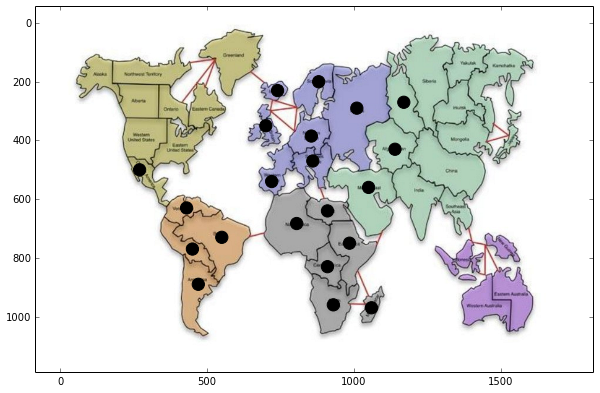

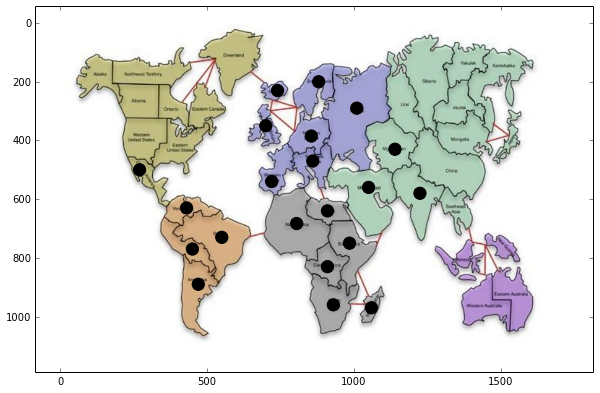

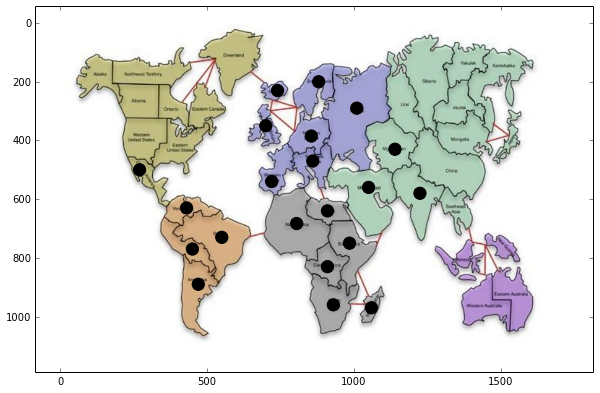

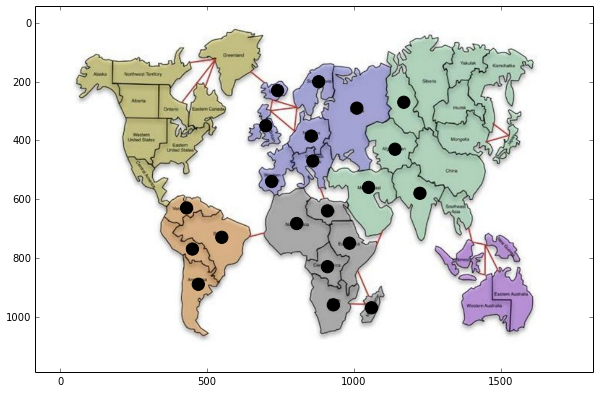

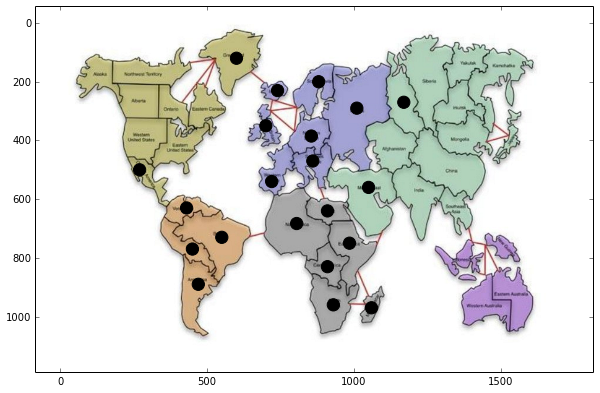

In [268]:
for s in double[0:5]:
    s.plot(), s.safe_nodes(), s.new_armies()

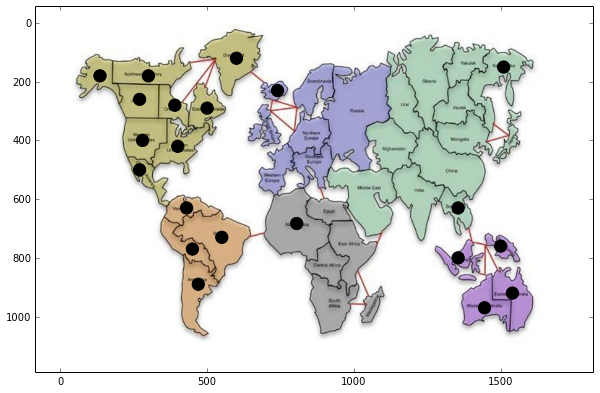

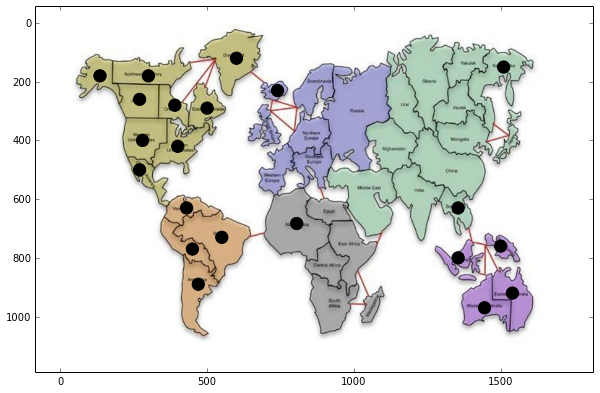

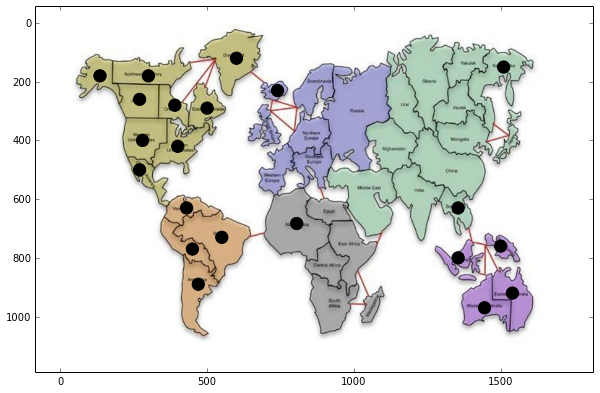

In [247]:
for s in nodes[0:3]:
    s.plot()

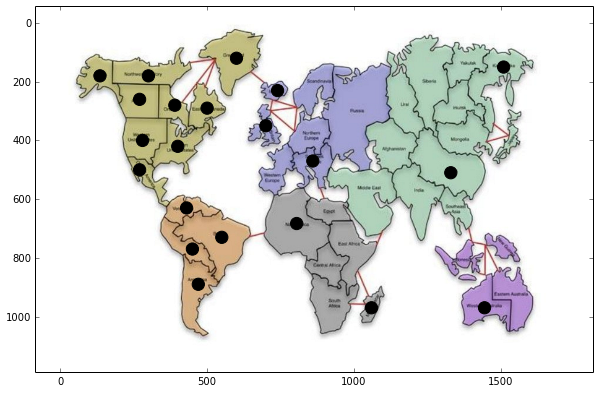

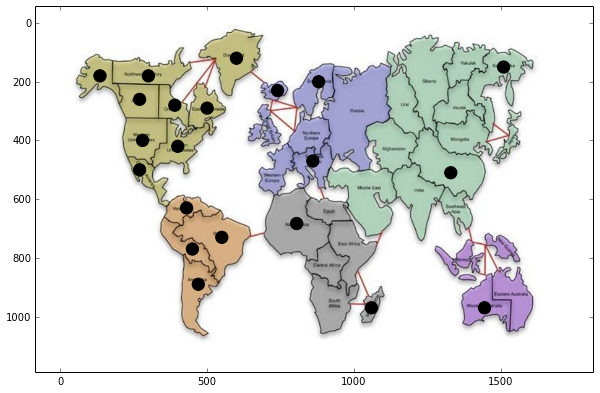

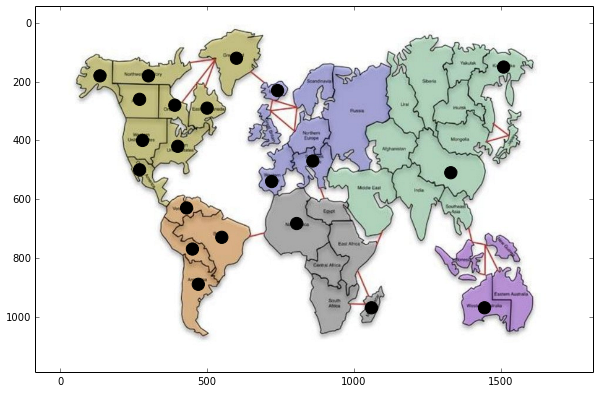

In [248]:
for s in ratio[0:3]:
    s.plot()

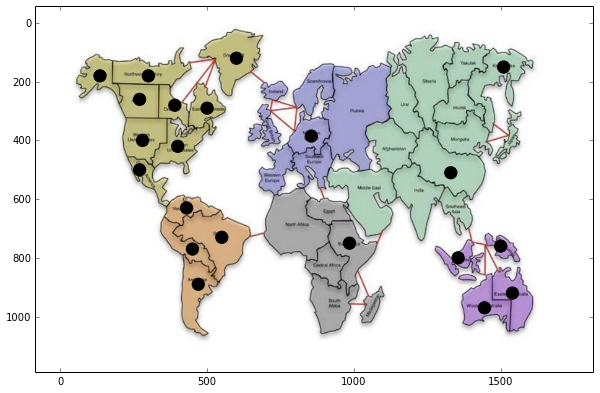

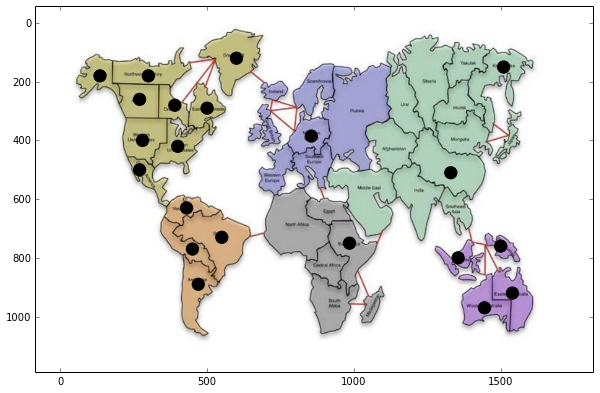

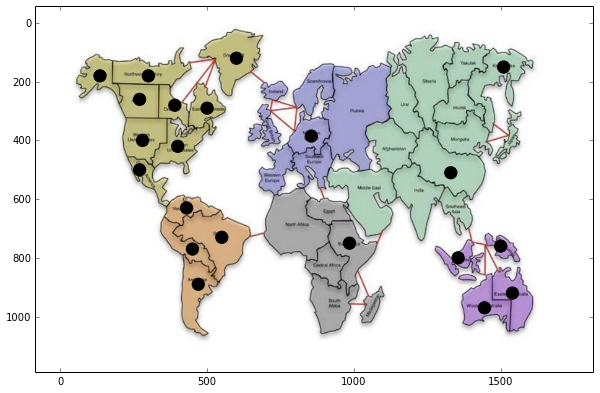

In [249]:
for s in difference[0:3]:
    s.plot()

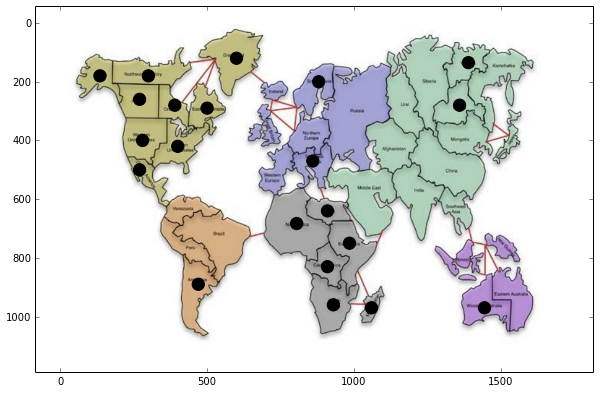

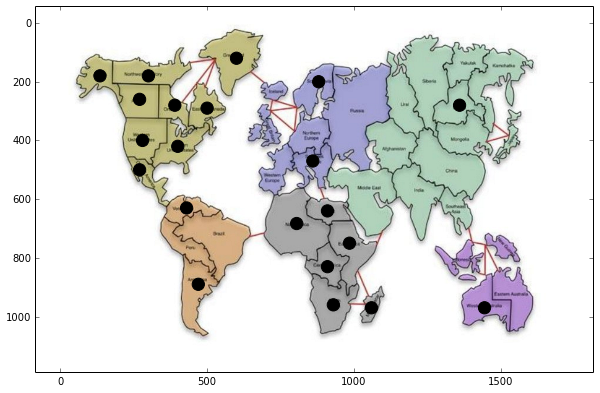

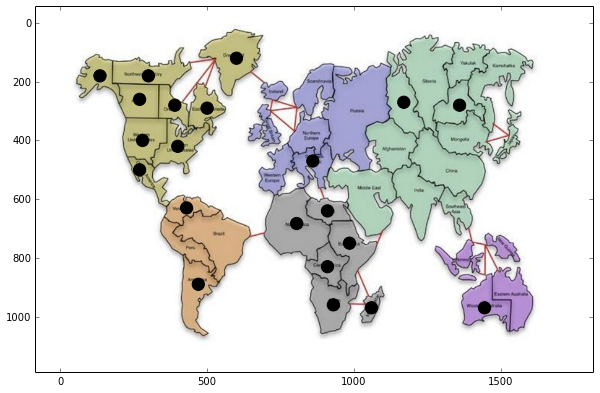

In [260]:
for s in army_difference[0:3]:
    s.plot()

In [40]:
[x.safe_nodes() for x in sample][0:10], [x.safe_nodes() for x in sample][-10:]

([3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [121]:
all_regions = risk.Allocation.all_regions

In [122]:
def full_continents(my_regions):
    retval = [ ]
    for continent, regions in risk.continents.items():
        n_regions = len(regions)
        n_my_regions = len([r for r in my_regions if r.continent() == continent])
        if n_regions == (n_my_regions):
            retval.append(continent)
    return retval
def new_armies(my_regions):
    retval = max(3, int(math.floor(len(my_regions)/3)))
    for continent in full_continents(my_regions):
        retval += risk.continent_bonus[continent]
    return retval

In [123]:
def safe_nodes(my_regions):
    retval = 0
    for r in my_regions:
        safe = True
        for n in r.neighbors():
            if not n in [x.name for x in my_regions]:
                safe = False
                break
        retval += safe
    return retval

In [124]:
new_armies(random.sample(regions, 42))

38

In [125]:
safe_nodes(random.sample(regions, 42))

42

(array([   35.,   419.,  1413.,  2636.,  2702.,  1732.,   798.,   209.,
           45.,    11.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.]),
 <a list of 10 Patch objects>)

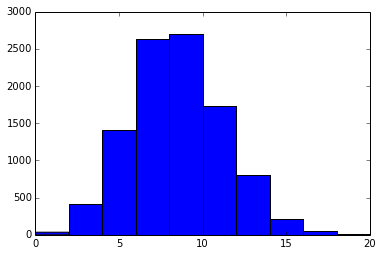

In [126]:
plt.hist([safe_nodes(random.sample(regions, 30)) for i in range(10000)], bins=10)
    

In [127]:
def find_max(regions, sample_size=21, n=1000, fct=new_armies):
    max_result  = -1e9
    best_sample = None
    for i in range(n):
        sample = random.sample(regions, sample_size)
        result = fct(sample)
        if result > max_result:
            max_result = result
            best_sample = sample
    return max_result, best_sample
            

In [128]:
%%time
#sample = find_max(regions, n=1000000, sample_size=10, fct=safe_nodes)
#print sample[0]

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.81 µs


In [129]:
def plot(regions, color='black'):
    im = plt.imread(os.getcwd() + '/risk.png')
    plt.figure(figsize = (10,15))
    implot = plt.imshow(im)
    for r in regions:
        coor = r.location()
        plt.scatter([coor[0]], [coor[1]], s = 150, c=color)
    plt.show()    

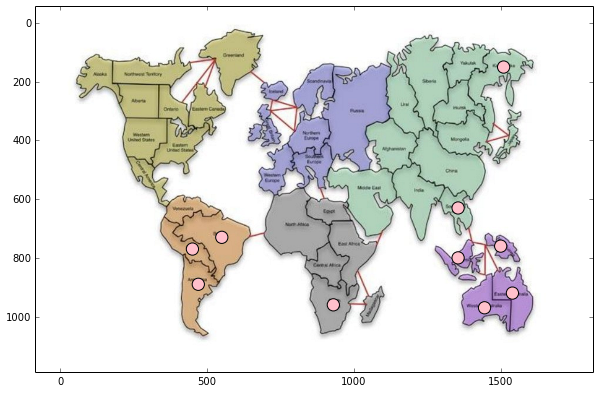

In [130]:
plot(sample[1], color='pink')

In [131]:
a = risk.Allocation()
a.sample(21)

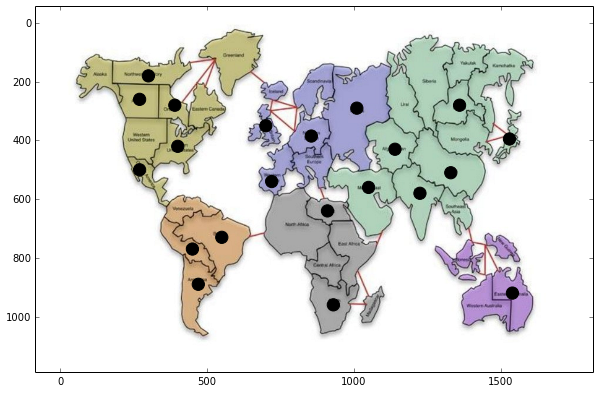

In [132]:
a.plot()

In [133]:
a.new_armies()

NameError: global name 'math' is not defined